In [1]:
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import string as st
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
path1 = "/content/drive/MyDrive/path/dataset1" # Specify the path for each dataset, this is an example path
path2 = "/content/drive/MyDrive/path/dataset2" # Specify the path for each dataset, this is an example path
path3 = "/content/drive/MyDrive/path/dataset3" # Specify the path for each dataset, this is an example path

# Initial Analysis on The Dataset


In [15]:
df_g = pd.read_csv(path1) # This dataframe is for bilirubin_in_plasma.csv
df_b = pd.read_csv(path2) # This dataframe is for glucose_in_blood.csv
df_w = pd.read_csv(path3) # This dataframe is for white_blood_cells_count.csv

dfs = {}
queries = ['glucose in blood', 'bilirubin in plasma', 'white blood cells count']

for query, df in zip(queries, [df_g, df_b, df_w]):
    dfs[query] = df

# Preprocessing of The Data

We need to do some preprocessing of the data:

*   remove punctuations in our string documents, specifically (long_common_name_column)
*   tokenize the strings
*   remove small tokens
*   filter out stop words
*   stemming and lemmatizating
*   get the part-of-speech tags

In [16]:
def remove_punctuation(text):

    clean_text = ""
    for ch in text:
        if ch not in st.punctuation:
            clean_text += ch

    return clean_text

for df in (df_g, df_w, df_b):
  df['removed_punctuations'] = df['long_common_name'].apply(lambda x: remove_punctuation(x))

df_g.head()

,loinc_num,long_common_name,component,system,property,relevance,presence,removed_punctuations
0,1988-5,C reactive protein [Mass/volume] in Serum or P...,C reactive protein,Ser/Plas,MCnc,0,0,C reactive protein Massvolume in Serum or Plasma
1,1959-6,Bicarbonate [Moles/volume] in Blood,Bicarbonate,Bld,SCnc,0,1,Bicarbonate Molesvolume in Blood
2,10331-7,Rh [Type] in Blood,Rh,Bld,Type,0,1,Rh Type in Blood
3,18998-5,Trimethoprim+Sulfamethoxazole [Susceptibility],Trimethoprim+Sulfamethoxazole,Isolate,Susc,0,0,TrimethoprimSulfamethoxazole Susceptibility
4,1975-2,Bilirubin.total [Mass/volume] in Serum or Plasma,Bilirubin,Ser/Plas,MCnc,0,0,Bilirubintotal Massvolume in Serum or Plasma


In [17]:
for df in (df_g, df_w, df_b):
  df['tokens'] = df['removed_punctuations'].apply(lambda x : word_tokenize(x.lower()))

df_g.head()

,loinc_num,long_common_name,component,system,property,relevance,presence,removed_punctuations,tokens
0,1988-5,C reactive protein [Mass/volume] in Serum or P...,C reactive protein,Ser/Plas,MCnc,0,0,C reactive protein Massvolume in Serum or Plasma,"[c, reactive, protein, massvolume, in, serum, ..."
1,1959-6,Bicarbonate [Moles/volume] in Blood,Bicarbonate,Bld,SCnc,0,1,Bicarbonate Molesvolume in Blood,"[bicarbonate, molesvolume, in, blood]"
2,10331-7,Rh [Type] in Blood,Rh,Bld,Type,0,1,Rh Type in Blood,"[rh, type, in, blood]"
3,18998-5,Trimethoprim+Sulfamethoxazole [Susceptibility],Trimethoprim+Sulfamethoxazole,Isolate,Susc,0,0,TrimethoprimSulfamethoxazole Susceptibility,"[trimethoprimsulfamethoxazole, susceptibility]"
4,1975-2,Bilirubin.total [Mass/volume] in Serum or Plasma,Bilirubin,Ser/Plas,MCnc,0,0,Bilirubintotal Massvolume in Serum or Plasma,"[bilirubintotal, massvolume, in, serum, or, pl..."


In [18]:
def remove_small_words(text):

  result = []
  for x in text:
    if len(x) > 3:
        result.append(x)

  return result

for df in (df_g, df_w, df_b):
    df['larger_tokens'] = df['tokens'].apply(lambda x : remove_small_words(x))

df_g.head()

,loinc_num,long_common_name,component,system,property,relevance,presence,removed_punctuations,tokens,larger_tokens
0,1988-5,C reactive protein [Mass/volume] in Serum or P...,C reactive protein,Ser/Plas,MCnc,0,0,C reactive protein Massvolume in Serum or Plasma,"[c, reactive, protein, massvolume, in, serum, ...","[reactive, protein, massvolume, serum, plasma]"
1,1959-6,Bicarbonate [Moles/volume] in Blood,Bicarbonate,Bld,SCnc,0,1,Bicarbonate Molesvolume in Blood,"[bicarbonate, molesvolume, in, blood]","[bicarbonate, molesvolume, blood]"
2,10331-7,Rh [Type] in Blood,Rh,Bld,Type,0,1,Rh Type in Blood,"[rh, type, in, blood]","[type, blood]"
3,18998-5,Trimethoprim+Sulfamethoxazole [Susceptibility],Trimethoprim+Sulfamethoxazole,Isolate,Susc,0,0,TrimethoprimSulfamethoxazole Susceptibility,"[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazole, susceptibility]"
4,1975-2,Bilirubin.total [Mass/volume] in Serum or Plasma,Bilirubin,Ser/Plas,MCnc,0,0,Bilirubintotal Massvolume in Serum or Plasma,"[bilirubintotal, massvolume, in, serum, or, pl...","[bilirubintotal, massvolume, serum, plasma]"


In [19]:
def remove_stopwords(text):

  result = []
  stopwords = set(nltk.corpus.stopwords.words('english'))

  for word in text:
    if word not in stopwords:
        result.append(word)

  return result


for df in (df_g, df_b, df_w):
  df['clean_tokens_wo_stopwords'] = df['larger_tokens'].apply(lambda x : remove_stopwords(x))

df_g.head()

,loinc_num,long_common_name,component,system,property,relevance,presence,removed_punctuations,tokens,larger_tokens,clean_tokens_wo_stopwords
0,1988-5,C reactive protein [Mass/volume] in Serum or P...,C reactive protein,Ser/Plas,MCnc,0,0,C reactive protein Massvolume in Serum or Plasma,"[c, reactive, protein, massvolume, in, serum, ...","[reactive, protein, massvolume, serum, plasma]","[reactive, protein, massvolume, serum, plasma]"
1,1959-6,Bicarbonate [Moles/volume] in Blood,Bicarbonate,Bld,SCnc,0,1,Bicarbonate Molesvolume in Blood,"[bicarbonate, molesvolume, in, blood]","[bicarbonate, molesvolume, blood]","[bicarbonate, molesvolume, blood]"
2,10331-7,Rh [Type] in Blood,Rh,Bld,Type,0,1,Rh Type in Blood,"[rh, type, in, blood]","[type, blood]","[type, blood]"
3,18998-5,Trimethoprim+Sulfamethoxazole [Susceptibility],Trimethoprim+Sulfamethoxazole,Isolate,Susc,0,0,TrimethoprimSulfamethoxazole Susceptibility,"[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazole, susceptibility]"
4,1975-2,Bilirubin.total [Mass/volume] in Serum or Plasma,Bilirubin,Ser/Plas,MCnc,0,0,Bilirubintotal Massvolume in Serum or Plasma,"[bilirubintotal, massvolume, in, serum, or, pl...","[bilirubintotal, massvolume, serum, plasma]","[bilirubintotal, massvolume, serum, plasma]"


In [20]:
def stemming(text):

  result = []
  ps = nltk.PorterStemmer()

  for word in text:
    stemmed_word = ps.stem(word)
    result.append(stemmed_word)

  return result


for df in (df_g, df_b, df_w):
  df['stem_words'] = df['clean_tokens_wo_stopwords'].apply(lambda x: stemming(x))

df_g.head()

,loinc_num,long_common_name,component,system,property,relevance,presence,removed_punctuations,tokens,larger_tokens,clean_tokens_wo_stopwords,stem_words
0,1988-5,C reactive protein [Mass/volume] in Serum or P...,C reactive protein,Ser/Plas,MCnc,0,0,C reactive protein Massvolume in Serum or Plasma,"[c, reactive, protein, massvolume, in, serum, ...","[reactive, protein, massvolume, serum, plasma]","[reactive, protein, massvolume, serum, plasma]","[reactiv, protein, massvolum, serum, plasma]"
1,1959-6,Bicarbonate [Moles/volume] in Blood,Bicarbonate,Bld,SCnc,0,1,Bicarbonate Molesvolume in Blood,"[bicarbonate, molesvolume, in, blood]","[bicarbonate, molesvolume, blood]","[bicarbonate, molesvolume, blood]","[bicarbon, molesvolum, blood]"
2,10331-7,Rh [Type] in Blood,Rh,Bld,Type,0,1,Rh Type in Blood,"[rh, type, in, blood]","[type, blood]","[type, blood]","[type, blood]"
3,18998-5,Trimethoprim+Sulfamethoxazole [Susceptibility],Trimethoprim+Sulfamethoxazole,Isolate,Susc,0,0,TrimethoprimSulfamethoxazole Susceptibility,"[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazol, suscept]"
4,1975-2,Bilirubin.total [Mass/volume] in Serum or Plasma,Bilirubin,Ser/Plas,MCnc,0,0,Bilirubintotal Massvolume in Serum or Plasma,"[bilirubintotal, massvolume, in, serum, or, pl...","[bilirubintotal, massvolume, serum, plasma]","[bilirubintotal, massvolume, serum, plasma]","[bilirubintot, massvolum, serum, plasma]"


In [21]:
def lemmatize(text):

  lemmatized_words = []
  word_net = WordNetLemmatizer()

  for word in text:
    lemmatized_words.append(word_net.lemmatize(word))

  return lemmatized_words


for df in (df_g, df_b, df_w):
  df['lemmatized_words'] = df['clean_tokens_wo_stopwords'].apply(lambda x : lemmatize(x))

df_w.head()

,loinc_num,long_common_name,component,system,property,relevance,presence,removed_punctuations,tokens,larger_tokens,clean_tokens_wo_stopwords,stem_words,lemmatized_words
0,33870-7,Bilirubin.total [Presence] in Unspecified spec...,Bilirubin,XXX,PrThr,0,0,Bilirubintotal Presence in Unspecified specimen,"[bilirubintotal, presence, in, unspecified, sp...","[bilirubintotal, presence, unspecified, specimen]","[bilirubintotal, presence, unspecified, specimen]","[bilirubintot, presenc, unspecifi, specimen]","[bilirubintotal, presence, unspecified, specimen]"
1,29265-6,Calcium [Moles/volume] corrected for albumin i...,Calcium^^corrected for albumin,Ser/Plas,SCnc,0,1,Calcium Molesvolume corrected for albumin in S...,"[calcium, molesvolume, corrected, for, albumin...","[calcium, molesvolume, corrected, albumin, ser...","[calcium, molesvolume, corrected, albumin, ser...","[calcium, molesvolum, correct, albumin, serum,...","[calcium, molesvolume, corrected, albumin, ser..."
2,14423-8,Bilirubin.total [Mass/volume] in Synovial fluid,Bilirubin,Synv fld,MCnc,0,0,Bilirubintotal Massvolume in Synovial fluid,"[bilirubintotal, massvolume, in, synovial, fluid]","[bilirubintotal, massvolume, synovial, fluid]","[bilirubintotal, massvolume, synovial, fluid]","[bilirubintot, massvolum, synovi, fluid]","[bilirubintotal, massvolume, synovial, fluid]"
3,23658-8,Other Antibiotic [Susceptibility],Antibiotic XXX,Isolate,Susc,0,0,Other Antibiotic Susceptibility,"[other, antibiotic, susceptibility]","[other, antibiotic, susceptibility]","[antibiotic, susceptibility]","[antibiot, suscept]","[antibiotic, susceptibility]"
4,19000-9,Vancomycin [Susceptibility],Vancomycin,Isolate,Susc,0,0,Vancomycin Susceptibility,"[vancomycin, susceptibility]","[vancomycin, susceptibility]","[vancomycin, susceptibility]","[vancomycin, suscept]","[vancomycin, susceptibility]"


In [22]:
def get_part_of_speech_tags(tokenized_sentence):

  return nltk.pos_tag(tokenized_sentence)

for df in (df_g, df_b, df_w):
  df['pos_tag'] = df['tokens'].apply(lambda x: get_part_of_speech_tags(x))

df_g.head()

,loinc_num,long_common_name,component,system,property,relevance,presence,removed_punctuations,tokens,larger_tokens,clean_tokens_wo_stopwords,stem_words,lemmatized_words,pos_tag
0,1988-5,C reactive protein [Mass/volume] in Serum or P...,C reactive protein,Ser/Plas,MCnc,0,0,C reactive protein Massvolume in Serum or Plasma,"[c, reactive, protein, massvolume, in, serum, ...","[reactive, protein, massvolume, serum, plasma]","[reactive, protein, massvolume, serum, plasma]","[reactiv, protein, massvolum, serum, plasma]","[reactive, protein, massvolume, serum, plasma]","[(c, NNS), (reactive, VBP), (protein, NN), (ma..."
1,1959-6,Bicarbonate [Moles/volume] in Blood,Bicarbonate,Bld,SCnc,0,1,Bicarbonate Molesvolume in Blood,"[bicarbonate, molesvolume, in, blood]","[bicarbonate, molesvolume, blood]","[bicarbonate, molesvolume, blood]","[bicarbon, molesvolum, blood]","[bicarbonate, molesvolume, blood]","[(bicarbonate, NN), (molesvolume, NN), (in, IN..."
2,10331-7,Rh [Type] in Blood,Rh,Bld,Type,0,1,Rh Type in Blood,"[rh, type, in, blood]","[type, blood]","[type, blood]","[type, blood]","[type, blood]","[(rh, NN), (type, NN), (in, IN), (blood, NN)]"
3,18998-5,Trimethoprim+Sulfamethoxazole [Susceptibility],Trimethoprim+Sulfamethoxazole,Isolate,Susc,0,0,TrimethoprimSulfamethoxazole Susceptibility,"[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazol, suscept]","[trimethoprimsulfamethoxazole, susceptibility]","[(trimethoprimsulfamethoxazole, JJ), (suscepti..."
4,1975-2,Bilirubin.total [Mass/volume] in Serum or Plasma,Bilirubin,Ser/Plas,MCnc,0,0,Bilirubintotal Massvolume in Serum or Plasma,"[bilirubintotal, massvolume, in, serum, or, pl...","[bilirubintotal, massvolume, serum, plasma]","[bilirubintotal, massvolume, serum, plasma]","[bilirubintot, massvolum, serum, plasma]","[bilirubintotal, massvolume, serum, plasma]","[(bilirubintotal, JJ), (massvolume, NN), (in, ..."


In [23]:
# This is the final part of the data cleaning and processing, we add a new column of clear text

def clean_text(tokens):

    sentence = ""
    for word in tokens:
        sentence += word + " "

    return sentence.strip()  # to remove trailing whitespace


for df in (df_g, df_b, df_w):
  df['clean_text'] = df['lemmatized_words'].apply(lambda x: clean_text(x))

df_g.head()

,loinc_num,long_common_name,component,system,property,relevance,presence,removed_punctuations,tokens,larger_tokens,clean_tokens_wo_stopwords,stem_words,lemmatized_words,pos_tag,clean_text
0,1988-5,C reactive protein [Mass/volume] in Serum or P...,C reactive protein,Ser/Plas,MCnc,0,0,C reactive protein Massvolume in Serum or Plasma,"[c, reactive, protein, massvolume, in, serum, ...","[reactive, protein, massvolume, serum, plasma]","[reactive, protein, massvolume, serum, plasma]","[reactiv, protein, massvolum, serum, plasma]","[reactive, protein, massvolume, serum, plasma]","[(c, NNS), (reactive, VBP), (protein, NN), (ma...",reactive protein massvolume serum plasma
1,1959-6,Bicarbonate [Moles/volume] in Blood,Bicarbonate,Bld,SCnc,0,1,Bicarbonate Molesvolume in Blood,"[bicarbonate, molesvolume, in, blood]","[bicarbonate, molesvolume, blood]","[bicarbonate, molesvolume, blood]","[bicarbon, molesvolum, blood]","[bicarbonate, molesvolume, blood]","[(bicarbonate, NN), (molesvolume, NN), (in, IN...",bicarbonate molesvolume blood
2,10331-7,Rh [Type] in Blood,Rh,Bld,Type,0,1,Rh Type in Blood,"[rh, type, in, blood]","[type, blood]","[type, blood]","[type, blood]","[type, blood]","[(rh, NN), (type, NN), (in, IN), (blood, NN)]",type blood
3,18998-5,Trimethoprim+Sulfamethoxazole [Susceptibility],Trimethoprim+Sulfamethoxazole,Isolate,Susc,0,0,TrimethoprimSulfamethoxazole Susceptibility,"[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazole, susceptibility]","[trimethoprimsulfamethoxazol, suscept]","[trimethoprimsulfamethoxazole, susceptibility]","[(trimethoprimsulfamethoxazole, JJ), (suscepti...",trimethoprimsulfamethoxazole susceptibility
4,1975-2,Bilirubin.total [Mass/volume] in Serum or Plasma,Bilirubin,Ser/Plas,MCnc,0,0,Bilirubintotal Massvolume in Serum or Plasma,"[bilirubintotal, massvolume, in, serum, or, pl...","[bilirubintotal, massvolume, serum, plasma]","[bilirubintotal, massvolume, serum, plasma]","[bilirubintot, massvolum, serum, plasma]","[bilirubintotal, massvolume, serum, plasma]","[(bilirubintotal, JJ), (massvolume, NN), (in, ...",bilirubintotal massvolume serum plasma


# TF-IDF & Cosine Similarities

TF-IDF weights are used to measure the importance or relevance of each term (or word) in a document or a corpus of documents.

Cosine similarity is a measure of similarity between two vectors in a high-dimensional space. In the present context, the vectors are typically the TF-IDF weights of the words in the documents. With cosine similarity we calculate the cosine of the angle between two vectors, which is a measure of how closely they are oriented in the same direction. If the two vectors are completely alligned, then the cosine similarity is equal to 1 and considered to be very similar. When they are orthogonal then it means that the content is not be a match.

In [25]:
tfidf = TfidfVectorizer()

vectors_df_g = tfidf.fit_transform(df_g['clean_text'])

# Get the index of the terms bilirubin and plasma in TF-IDF vocabulary
glucose_index = tfidf.vocabulary_['glucose']
blood_index = tfidf.vocabulary_['blood']

# selects the column corresponding to the "bilirubin" & "plasma" term from the TF-IDF vectors of all documents in df_g
glucose_tfidf_score = vectors_df_g[:, glucose_index].toarray()
blood_tfidf_score = vectors_df_g[:, blood_index].toarray()

df_g['glucose_index_tfidf_score'] = glucose_tfidf_score
df_g['blood_tfidf_score'] = blood_tfidf_score

first_query = queries[0]
print(first_query)
search_term_vector_df_g = tfidf.transform([first_query])
cosine_similarities_df_g = linear_kernel(vectors_df_g, search_term_vector_df_g).flatten()

target_words = set(['glucose', 'blood'])

def jaccard_similarity(x, target_words):
    return len(set(x) & target_words) / len(set(x) | target_words)

df_g['jaccard_similarity'] = df_g['lemmatized_words'].apply(jaccard_similarity, target_words=target_words)

glucose in blood


Now for *bilirubin in plasma* query

In [26]:
tfidf = TfidfVectorizer()

vectors_df_b = tfidf.fit_transform(df_b['clean_text'])

# Get the index of the terms bilirubin and plasma in TF-IDF vocabulary
bilirubin_index = tfidf.vocabulary_['bilirubin']
plasma_index = tfidf.vocabulary_['plasma']

# selects the column corresponding to the "bilirubin" & "plasma" term from the TF-IDF vectors of all documents in df_g
bilirubin_tfidf_score = vectors_df_b[:, bilirubin_index].toarray()
plasma_tfidf_score = vectors_df_b[:, plasma_index].toarray()

df_b['bilirubin_index_tfidf_score'] = bilirubin_tfidf_score
df_b['plasma_tfidf_score'] = plasma_tfidf_score

second_query = queries[1]
print(second_query)
search_term_vector_df_b = tfidf.transform([second_query])
cosine_similarities_df_b = linear_kernel(vectors_df_b, search_term_vector_df_b).flatten()

target_words = set(['bilirubin', 'plasma'])

def jaccard_similarity(x, target_words):
    return len(set(x) & target_words) / len(set(x) | target_words)

df_b['jaccard_similarity'] = df_b['lemmatized_words'].apply(jaccard_similarity, target_words=target_words)

bilirubin in plasma


Lastly, for *white blood cells count*

In [27]:
tfidf = TfidfVectorizer()

vectors_df_w = tfidf.fit_transform(df_w['clean_text'])

# Get the index of the terms glucose and blood in TF-IDF vocabulary
# cell_index = tfidf.vocabulary_['cell'] Cell is not present in the vocabulary
count_index = tfidf.vocabulary_['count']
blood_index = tfidf.vocabulary_['blood']

# selects the column corresponding to the "glucose" & "blood" term from the TF-IDF vectors of all documents in df_g
count_tfidf_score = vectors_df_w[:, count_index].toarray()
blood_tfidf_score = vectors_df_w[:, blood_index].toarray()

df_w['count_tfidf_score'] = count_tfidf_score
df_w['blood_tfidf_score'] = blood_tfidf_score

third_query = queries[2]
print(third_query)
search_term_vector_df_w = tfidf.transform([third_query ])
cosine_similarities_df_w = linear_kernel(vectors_df_w, search_term_vector_df_w).flatten()

target_words = set(['white','blood','cell','count'])

def jaccard_similarity(x, target_words):
    return len(set(x) & target_words) / len(set(x) | target_words)

df_w['jaccard_similarity'] = df_w['lemmatized_words'].apply(jaccard_similarity, target_words=target_words)

white blood cells count


# Preparing The Code For Logistic Regression

# Label Encdoing The Categorical Features

In [28]:
df_g = df_g.drop(columns=["removed_punctuations","tokens","larger_tokens", "clean_tokens_wo_stopwords","stem_words","lemmatized_words","pos_tag","clean_text"])

In [29]:
df_w = df_w.drop(columns=["removed_punctuations","tokens","larger_tokens", "clean_tokens_wo_stopwords","stem_words","lemmatized_words","pos_tag","clean_text"])

In [30]:
df_b = df_b.drop(columns=["removed_punctuations","tokens","larger_tokens", "clean_tokens_wo_stopwords","stem_words","lemmatized_words","pos_tag","clean_text"])

In [31]:
label_encoders = {}
categorical_columns = ['long_common_name', 'component', 'system', 'property']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_g[col] = label_encoders[col].fit_transform(df_g[col])
    df_w[col] = label_encoders[col].fit_transform(df_w[col])
    df_b[col] = label_encoders[col].fit_transform(df_b[col])

df_g.info()
df_g.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loinc_num                  124 non-null    object 
 1   long_common_name           124 non-null    int64  
 2   component                  124 non-null    int64  
 3   system                     124 non-null    int64  
 4   property                   124 non-null    int64  
 5   relevance                  124 non-null    int64  
 6   presence                   124 non-null    int64  
 7   glucose_index_tfidf_score  124 non-null    float64
 8   blood_tfidf_score          124 non-null    float64
 9   jaccard_similarity         124 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 9.8+ KB


,loinc_num,long_common_name,component,system,property,relevance,presence,glucose_index_tfidf_score,blood_tfidf_score,jaccard_similarity
0,1988-5,24,21,15,9,0,0,0.0,0.000000,0.000000
1,1959-6,11,11,0,18,0,1,0.0,0.269171,0.250000
2,10331-7,120,71,0,22,0,1,0.0,0.376908,0.333333
3,18998-5,121,73,10,19,0,0,0.0,0.000000,0.000000
4,1975-2,15,12,15,9,0,0,0.0,0.000000,0.000000


In [32]:
df_w.info()
df_w.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loinc_num           129 non-null    object 
 1   long_common_name    129 non-null    int64  
 2   component           129 non-null    int64  
 3   system              129 non-null    int64  
 4   property            129 non-null    int64  
 5   relevance           129 non-null    int64  
 6   presence            129 non-null    int64  
 7   count_tfidf_score   129 non-null    float64
 8   blood_tfidf_score   129 non-null    float64
 9   jaccard_similarity  129 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 10.2+ KB


,loinc_num,long_common_name,component,system,property,relevance,presence,count_tfidf_score,blood_tfidf_score,jaccard_similarity
0,33870-7,24,13,20,12,0,0,0.0,0.0,0.0
1,29265-6,34,26,14,13,0,1,0.0,0.0,0.0
2,14423-8,23,13,16,4,0,0,0.0,0.0,0.0
3,23658-8,118,9,8,14,0,0,0.0,0.0,0.0
4,19000-9,128,75,8,14,0,0,0.0,0.0,0.0


In [33]:
df_b.info()
df_b.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loinc_num                    83 non-null     object 
 1   long_common_name             83 non-null     int64  
 2   component                    83 non-null     int64  
 3   system                       83 non-null     int64  
 4   property                     83 non-null     int64  
 5   relevance                    83 non-null     int64  
 6   presence                     83 non-null     int64  
 7   bilirubin_index_tfidf_score  83 non-null     float64
 8   plasma_tfidf_score           83 non-null     float64
 9   jaccard_similarity           83 non-null     float64
dtypes: float64(3), int64(6), object(1)
memory usage: 6.6+ KB


,loinc_num,long_common_name,component,system,property,relevance,presence,bilirubin_index_tfidf_score,plasma_tfidf_score,jaccard_similarity
0,934-0,36,25,3,9,0,0,0.0,0.000000,0.000000
1,1742-6,3,2,8,1,0,1,0.0,0.182697,0.142857
2,20565-8,45,32,0,11,0,0,0.0,0.000000,0.000000
3,1959-6,11,11,0,11,0,0,0.0,0.000000,0.000000
4,18906-8,55,40,4,12,0,0,0.0,0.000000,0.000000


# Normalize the attributes

In [34]:
columns_to_normalize = ["long_common_name", "component", "system", "property"]
data_to_normalize_w = df_w[columns_to_normalize]
#data_to_normalize_b = df_b[columns_to_normalize]
data_to_normalize_g = df_g[columns_to_normalize]

scaler = MinMaxScaler()

normalized_data_w = scaler.fit_transform(data_to_normalize_w)
#normalized_data_b = scaler.fit_transform(data_to_normalize_b)
normalized_data_g = scaler.fit_transform(data_to_normalize_g)

df_normalized_w = pd.DataFrame(normalized_data_w, columns=columns_to_normalize)
df_normalized_g = pd.DataFrame(normalized_data_g, columns=columns_to_normalize)
#df_normalized_b = pd.DataFrame(normalized_data_b, columns=columns_to_normalize)

df_w[columns_to_normalize] = df_normalized_w
#df_b[columns_to_normalize] = df_normalized_b
df_g[columns_to_normalize] = df_normalized_g

# Split Dataset Tnto Training & Testing

In [35]:
Xb = df_b.drop(columns = ['relevance', 'loinc_num']) # this vector feature is for bilirubin_in_plasma.csv
Yb = df_b['relevance'] # this vector class is for bilirubin_in_plasma.csv

Xg = df_g.drop(columns = ['relevance', 'loinc_num']) # this vector feature is for glucose_in_blood.csv
yg = df_g['relevance'] # this vector class is for glucose_in_blood.csv

Xw = df_w.drop(columns = ['relevance', 'loinc_num']) # this vector feature is for white_blood_cells_count.csv
yw = df_w['relevance'] # this vector class is for white_blood_cells_count.csv

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(Xb, Yb, test_size=0.3, random_state=42, stratify = Yb) # train and testing sets for bilirubin_in_plasma.csv
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(Xg, yg, test_size=0.3, random_state=42, stratify=yg) # train and testing sets for glucose_in_blood.csv
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(Xw, yw, test_size=0.3, random_state=42, stratify=yw) # train and testing sets for white_blood_cells_count.csv


# Logistic Regression Model (PointWise Approach) for Glucose in blood query

In [36]:
# Train a logistic regression model
model_glucose = LogisticRegression()
model_glucose.fit(X_train_g, y_train_g)
y_pred_g = model_glucose.predict(X_test_g)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test_g, y_pred_g)
precision = precision_score(y_test_g, y_pred_g)
recall = recall_score(y_test_g, y_pred_g)
f1 = f1_score(y_test_g, y_pred_g)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9210526315789473
Precision: 0.8636363636363636
Recall: 1.0
F1-score: 0.9268292682926829


# Logistic Regression Model (PointWise Approach) for Bulirubin in plasma query

In [37]:
# Train a logistic regression model
model_bulirubin = LogisticRegression()
model_bulirubin.fit(X_train_b, y_train_b)
y_pred_b = model_bulirubin.predict(X_test_b)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test_b, y_pred_b)
precision = precision_score(y_test_b, y_pred_b)
recall = recall_score(y_test_b, y_pred_b)
f1 = f1_score(y_test_b, y_pred_b)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.68
Precision: 0.375
Recall: 0.5
F1-score: 0.42857142857142855


# Logistic Regression Model (PointWise Approach) for white blood cells count


In [38]:
# Train logistic regression model
model_whithe = LogisticRegression()
model_whithe.fit(X_train_w, y_train_w)
y_pred_w = model_whithe.predict(X_test_w)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test_w, y_pred_w)
precision = precision_score(y_test_w, y_pred_w)
recall = recall_score(y_test_w, y_pred_w)
f1 = f1_score(y_test_w, y_pred_w)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8717948717948718
Precision: 0.8947368421052632
Recall: 0.85
F1-score: 0.8717948717948718


# Other evaluation metrics

## Confusion matrix and ROC curve

## Glucose model

In [39]:
# Confusion Matrix
cmg = confusion_matrix(y_test_g, y_pred_g)
print("Confusion Matrix for glucose in blood:")
print(cmg)

Confusion Matrix for glucose in blood:
[[16  3]
 [ 0 19]]


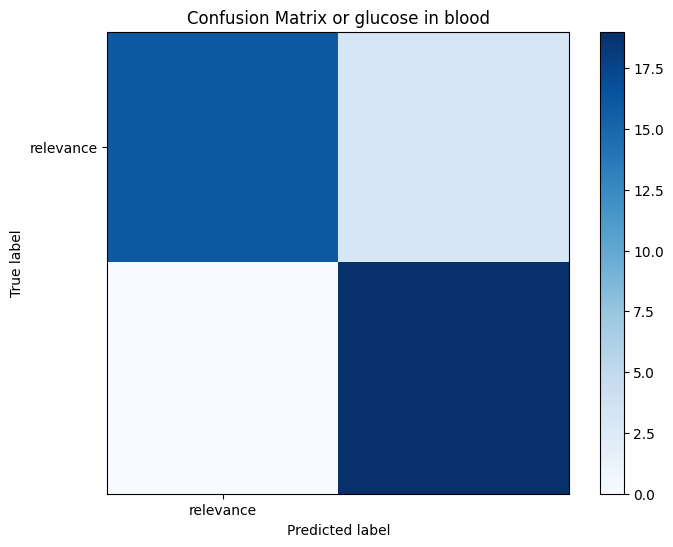

In [40]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cmg, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix or glucose in blood')
plt.colorbar()
classes = ['relevance']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

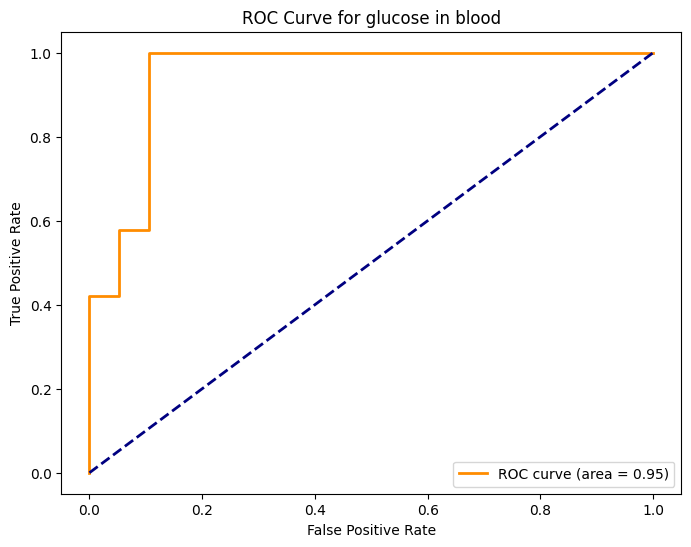

In [41]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_g, model_glucose.predict_proba(X_test_g)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for glucose in blood')
plt.legend(loc='lower right')
plt.show()

## Bilirubin model

In [42]:
# Confusion Matrix
cmb = confusion_matrix(y_test_b, y_pred_b)
print("Confusion Matrix for bilirubin in plasma:")
print(cmb)

Confusion Matrix for bilirubin in plasma:
[[14  5]
 [ 3  3]]


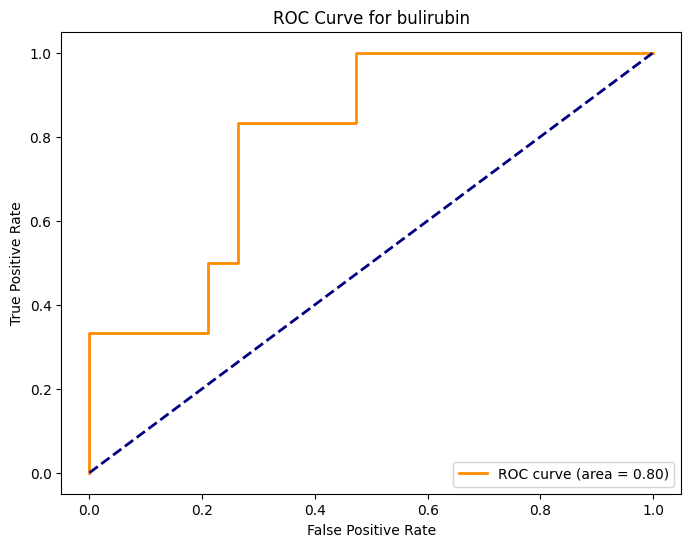

In [43]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_b, model_bulirubin.predict_proba(X_test_b)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for bulirubin')
plt.legend(loc='lower right')
plt.show()

## White cells model

In [44]:
# Confusion Matrix
cmw = confusion_matrix(y_test_w, y_pred_w)
print("Confusion Matrix for white cells in plasma:")
print(cmw)

Confusion Matrix for white cells in plasma:
[[17  2]
 [ 3 17]]


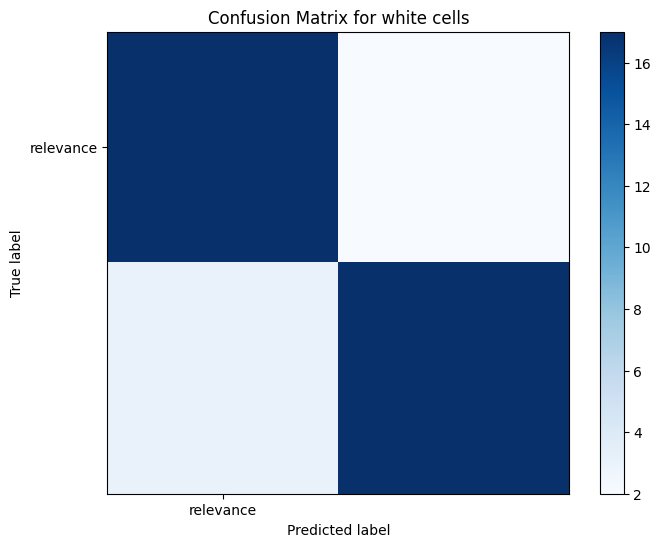

In [45]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cmw, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for white cells')
plt.colorbar()
classes = ['relevance']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

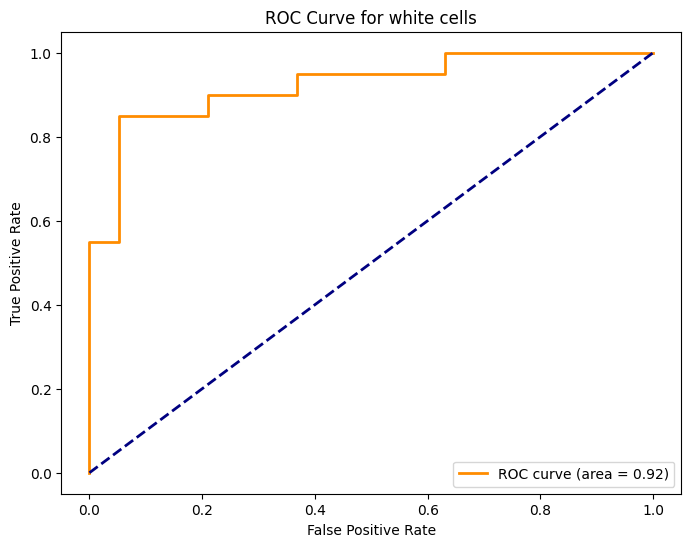

In [46]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_w, model_whithe.predict_proba(X_test_w)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for white cells')
plt.legend(loc='lower right')
plt.show()